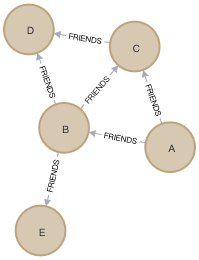
https://neo4j.com/graphacademy/online-training/data-science/part-4/

In [1]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth', 100)


In [2]:
import json
db_conf = json.load(open("./config.json"))
graph = Graph(db_conf['GDB_URL'], auth=(db_conf['GDB_NAME'], db_conf['GDB_PASS']))

In [3]:
query = """
MATCH (a:Node {name: 'A'})
MATCH (d:Node {name: 'E'})
RETURN gds.alpha.linkprediction.adamicAdar(a, d) AS score
"""

graph.run(query).to_data_frame()

,score
0,0.721


In [6]:
query ="""MATCH (a:Node), (b:Node)
WHERE a <> b AND a.name < b.name AND not((a)-[:FRIENDS]-(b))
RETURN a.name, b.name, gds.alpha.linkprediction.adamicAdar(a, b) AS score
ORDER BY score DESC"""

graph.run(query)

 a.name | b.name |              score 
--------|--------|--------------------
 A      | D      |  1.631586747071319 
 A      | E      | 0.7213475204444817 
 C      | E      | 0.7213475204444817 